# <a id='toc1_'></a>[**The Matthew Effect in Income: Measuring Intergenerational Mobility and Estimating Income Elasticity Using PSID Data**](#toc0_)

<center>BY Dirty Jiang</center>


**Table of contents**<a id='toc0_'></a>    
- [**The Matthew Effect in Income: Measuring Intergenerational Mobility and Estimating Income Elasticity Using PSID Data**](#toc1_)    
  - [Abstract](#toc1_1_)    
  - [Project Background](#toc1_2_)    
  - [Project Practice](#toc1_3_)    
    - [Data Importing](#toc1_3_1_)    
    - [Data Structuring Exploration And Visual Analysis](#toc1_3_2_)    
      - [Univariate Distribution Analysis](#toc1_3_2_1_)    
      - [Multivariate Distribution Analysis by Grouping Variables](#toc1_3_2_2_)    
    - [Feature Engineering](#toc1_3_3_)    
    - [Regression Engineering](#toc1_3_4_)    
    - [Predictive Engineering](#toc1_3_5_)    
      - [Baseline Prediction(Standard Prediction)](#toc1_3_5_1_)    
        - [Linear Regression](#toc1_3_5_1_1_)    
        - [Decision Tree Regression](#toc1_3_5_1_2_)    
        - [Random Forest Regression](#toc1_3_5_1_3_)    
      - [Standardized Prediction](#toc1_3_5_2_)    
        - [Decision Tree Regression](#toc1_3_5_2_1_)    
        - [Random Forest Regression](#toc1_3_5_2_2_)    
      - [Classification-Based Prediction](#toc1_3_5_3_)    
  - [Project Summary](#toc1_4_)    
    - [Project Review](#toc1_4_1_)    
    - [Real-World Implications](#toc1_4_2_)    
    - [Limitations](#toc1_4_3_)    
  - [Appendix: Exploring the Possible Exhaustion of the Data's Explanatory Power](#toc1_5_)    
  - [References](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Abstract](#toc0_)
This project investigates the intergenerational transmission of income using cleaned and structured data from the Panel Study of Income Dynamics (PSID). The dataset covers three generations of U.S. households and includes information on income, education, gender, and race.

We apply a comprehensive data science workflow, including exploratory data analysis, feature engineering, multiple regression models, and predictive algorithms. The core finding is that the intergenerational income elasticity (IGE) between the second and third generation is approximately **0.33**, indicating a moderate level of income persistence and an income mobility of about **0.67**. This is consistent with the literature on economic inequality in the United States.

Beyond regression, we also test out-of-sample predictive performance using linear models, decision trees, and random forests, both in regression and classification settings. Classification models that segment income into ordinal levels perform slightly better, but the generalization scores across all models remain within a narrow range. This suggests that the explanatory power of the available features may be close to exhaustion.

The project highlights both the **analytical value of intergenerational elasticity estimates** and the **limits of observable features in predicting economic outcomes**. Our findings provide empirical evidence for the persistence of income inequality across generations and shed light on the challenges of achieving upward mobility through observable socioeconomic factors alone.

## <a id='toc1_2_'></a>[Project Background](#toc0_)


The **Matthew Effect** refers to the phenomenon where the advantaged become even more advantaged, while the disadvantaged fall further behind. This concept originates from a parable in the Gospel of Matthew in the Bible:  
> “For whoever has will be given more, and they will have an abundance. Whoever does not have, even what they have will be taken from them.”

It reflects the tendency for limited resources to concentrate among individuals or organizations that are already privileged. The Matthew Effect is widely applied in fields such as social psychology, education, finance, and science.

Empirically, the Matthew Effect can be interpreted as the explanatory power of a prior-period outcome variable on the current-period outcome. That is, $ \ y_{t-1} $ becomes part of the explanatory variables  X  for $\ y_{t} $, forming a recursive function over time.

Such intertemporal effects are common in real life. For example, possessing Award A may increase your chances of being granted Award B, and vice versa. This feedback loop often leads to the clustering of awards and honors within certain groups. A popular phrase on the Chinese internet, *“sheng sheng bu xi”(胜胜不息)* (literally “victory after victory without end”), captures this idea: an initial success often leads to more success, echoing the Matthew Effect in a vivid way.

In the context of intergenerational economics, we can regard members of the same family generation as individual units. Thus, the income of the parent generation $ \ y_{0} $  and that of the child generation $ \ y_{1} $  naturally form a causal pair. This captures a clear form of the Matthew Effect—**the persistence of income across generations**. Two commonly used concepts to quantify this relationship are **intergenerational income elasticity (IGE)** and **intergenerational income mobility**, both of which serve as key indicators of economic inequality and social class rigidity in economics.

Since the beginning of China's reform and opening-up policy, the economy has experienced tremendous growth, and living standards have significantly improved. However, the emphasis on efficiency has also led to widening income inequality. China's Gini coefficient has remained above the 0.4 warning line for years. In such a context, if income levels are persistently transmitted from parents to children, **social stratification** becomes entrenched. As upward mobility narrows, those at the lower end of the income distribution may lose motivation, which could undermine normal socioeconomic functioning. Worsening intergenerational income inequality is therefore a key challenge in achieving China’s goal of **common prosperity**[1](#references).

In general, children’s income is correlated with that of their parents. A **low IGE** suggests that children's income is more determined by their own efforts and talents—indicative of a fairer society. In contrast, a **high IGE** implies strong dependence on parental income and a higher degree of social rigidity.

The formal estimation of IGE is typically represented by the following regression equation proposed by Becker and Tomes:

$$ 
\ln y_{1,i} = \alpha + \beta \ln y_{0,i} + \varepsilon_{i}
$$

Here, $ \ln y_{1,i} $ denotes the logarithm of the child’s income, and $ \ln y_{0,i} $ the logarithm of the parent’s income. The coefficient $ \beta $ represents the **intergenerational income elasticity**, while $ 1 - \beta $ represents the **degree of intergenerational income mobility**. A higher $ \beta $ implies greater income persistence and lower mobility, reflecting a more unequal society.

This project utilizes a processed dataset from the **Panel Study of Income Dynamics (PSID)**, which includes income and education data across three generations of U.S. families. Our goals are twofold: (1) to estimate the intergenerational income elasticity (IGE) in the United States, and (2) to evaluate how effectively various socioeconomic characteristics can predict the third generation’s income outcomes.


## <a id='toc1_3_'></a>[Project Practice](#toc0_)

### <a id='toc1_3_1_'></a>[Data Importing](#toc0_)

This dataset is derived from the **Panel Study of Income Dynamics (PSID)**, extracted from a cleaned and curated version available on **OpenICPSR**. The dataset has undergone preprocessing steps, including filtering and variable transformation, to facilitate empirical research.**You can click [here](https://www.openicpsr.org/openicpsr/project/185941/version/V2/view) for the original data.**

The original data documentation provides the following description:

> "Here are some details about the variables in the data. All cases are from the cross-sectional Survey Research Sample of the PSID. In each generation, we took each respondent's annual income over several surveys from age 30 to 45, adjusted to 2022 dollars, and took the average. We truncated the data to the range from \$5,000 to \$448,501.10, where the bottom code is arbitrary and the top code is what we believe to be the lowest PSID top code over the series (in 1978), converted to 2022 dollars. Education is the first report at ages 30–45, coded as less than high school, high school, some college, or 4+ years of college. We merged the data together across generations using the PSID Family Identification Mapping System 3-generation prospective linkage file. See for_replication.zip for code to produce these data as well as a log file noting sample restrictions."

In summary, the dataset includes:

- Cross-sectional samples from multiple generations within PSID.
- Average annual income for each individual from age 30 to 45, adjusted to 2022 dollars.
- Income values truncated between \$5,000 and \$448,501.10.
- Education levels classified into four categories: less than high school, high school, some college, and 4+ years of college.
- Family linkages established through PSID’s three-generation mapping system.

This processed dataset provides a consistent and well-structured foundation for examining intergenerational income dynamics.


In [1]:
#import necessary module
import numpy as np
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
#ignore the warnings make the output cleaner
import warnings
warnings.filterwarnings('ignore')  

from IPython.display import display

In [2]:
learning=pd.read_csv(r'RawData\PSID\for_students\for_students\learning.csv')
print(learning.info())
learning.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365 entries, 0 to 1364
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   g1_id          1365 non-null   int64  
 1   g2_id          1365 non-null   int64  
 2   g3_id          1365 non-null   int64  
 3   race           1365 non-null   object 
 4   sex            1365 non-null   object 
 5   g1_educ        1365 non-null   object 
 6   g2_educ        1365 non-null   object 
 7   g3_educ        1365 non-null   object 
 8   g1_log_income  1365 non-null   float64
 9   g2_log_income  1365 non-null   float64
 10  g3_log_income  1365 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 117.4+ KB
None


,g1_id,g2_id,g3_id,race,sex,g1_educ,g2_educ,g3_educ,g1_log_income,g2_log_income,g3_log_income
0,1,1,1,White,Female,Less than high school,Less than high school,High school,10.898823,11.274951,10.742104
1,1,2,4,White,Female,Less than high school,High school,Some college,10.898823,12.051807,11.526852
2,1,4,7,White,Female,Less than high school,High school,High school,10.898823,11.385779,11.239182
3,2,6,9,White,Female,Less than high school,Less than high school,High school,10.663043,11.274951,10.742104
4,2,6,10,White,Male,Less than high school,Less than high school,High school,10.663043,11.274951,10.719895


Based on the documentation, the dataset contains **1,365 observations**, with each entry recording information across **three generations**. It includes the following **11 variables**:

- Unique IDs for Generation 1 (G1), Generation 2 (G2), and Generation 3 (G3)
- Educational attainment for each generation
- Log-transformed income for each generation
- Gender and race for the third generation

Importantly, there are **no missing values**, and all variables are well-structured and ready for analysis. In short, this is a well-processed and reliable dataset suitable for intergenerational studies.

The author initially attempted to work directly with the **raw PSID data**, but found the process extremely time-consuming due to the complexity of the accompanying instructions and guidelines. As a result, this project adopts a **cleaned and curated version** of the data, which is widely used in replication studies. This choice significantly reduces preprocessing time and ensures the validity and consistency of our subsequent analysis.

### <a id='toc1_3_2_'></a>[Data Structuring Exploration And Visual Analysis](#toc0_)

#### <a id='toc1_3_2_1_'></a>[Univariate Distribution Analysis](#toc0_)

We begin by exploring the structure of each variable individually and visualizing their distributions. The variables in the dataset can be broadly classified into two types:

- **Categorical variables**, such as gender, race, and education level
- **Continuous variables**, such as log-transformed income across generations

For categorical variables, we use **pie charts** to display the proportion of each category. For continuous variables, we use **kernel density estimation (KDE) plots** to visualize their distribution shapes.

Through this initial univariate analysis, we gain a clearer understanding of the overall composition and characteristics of the dataset, which lays the foundation for subsequent multivariate analysis.

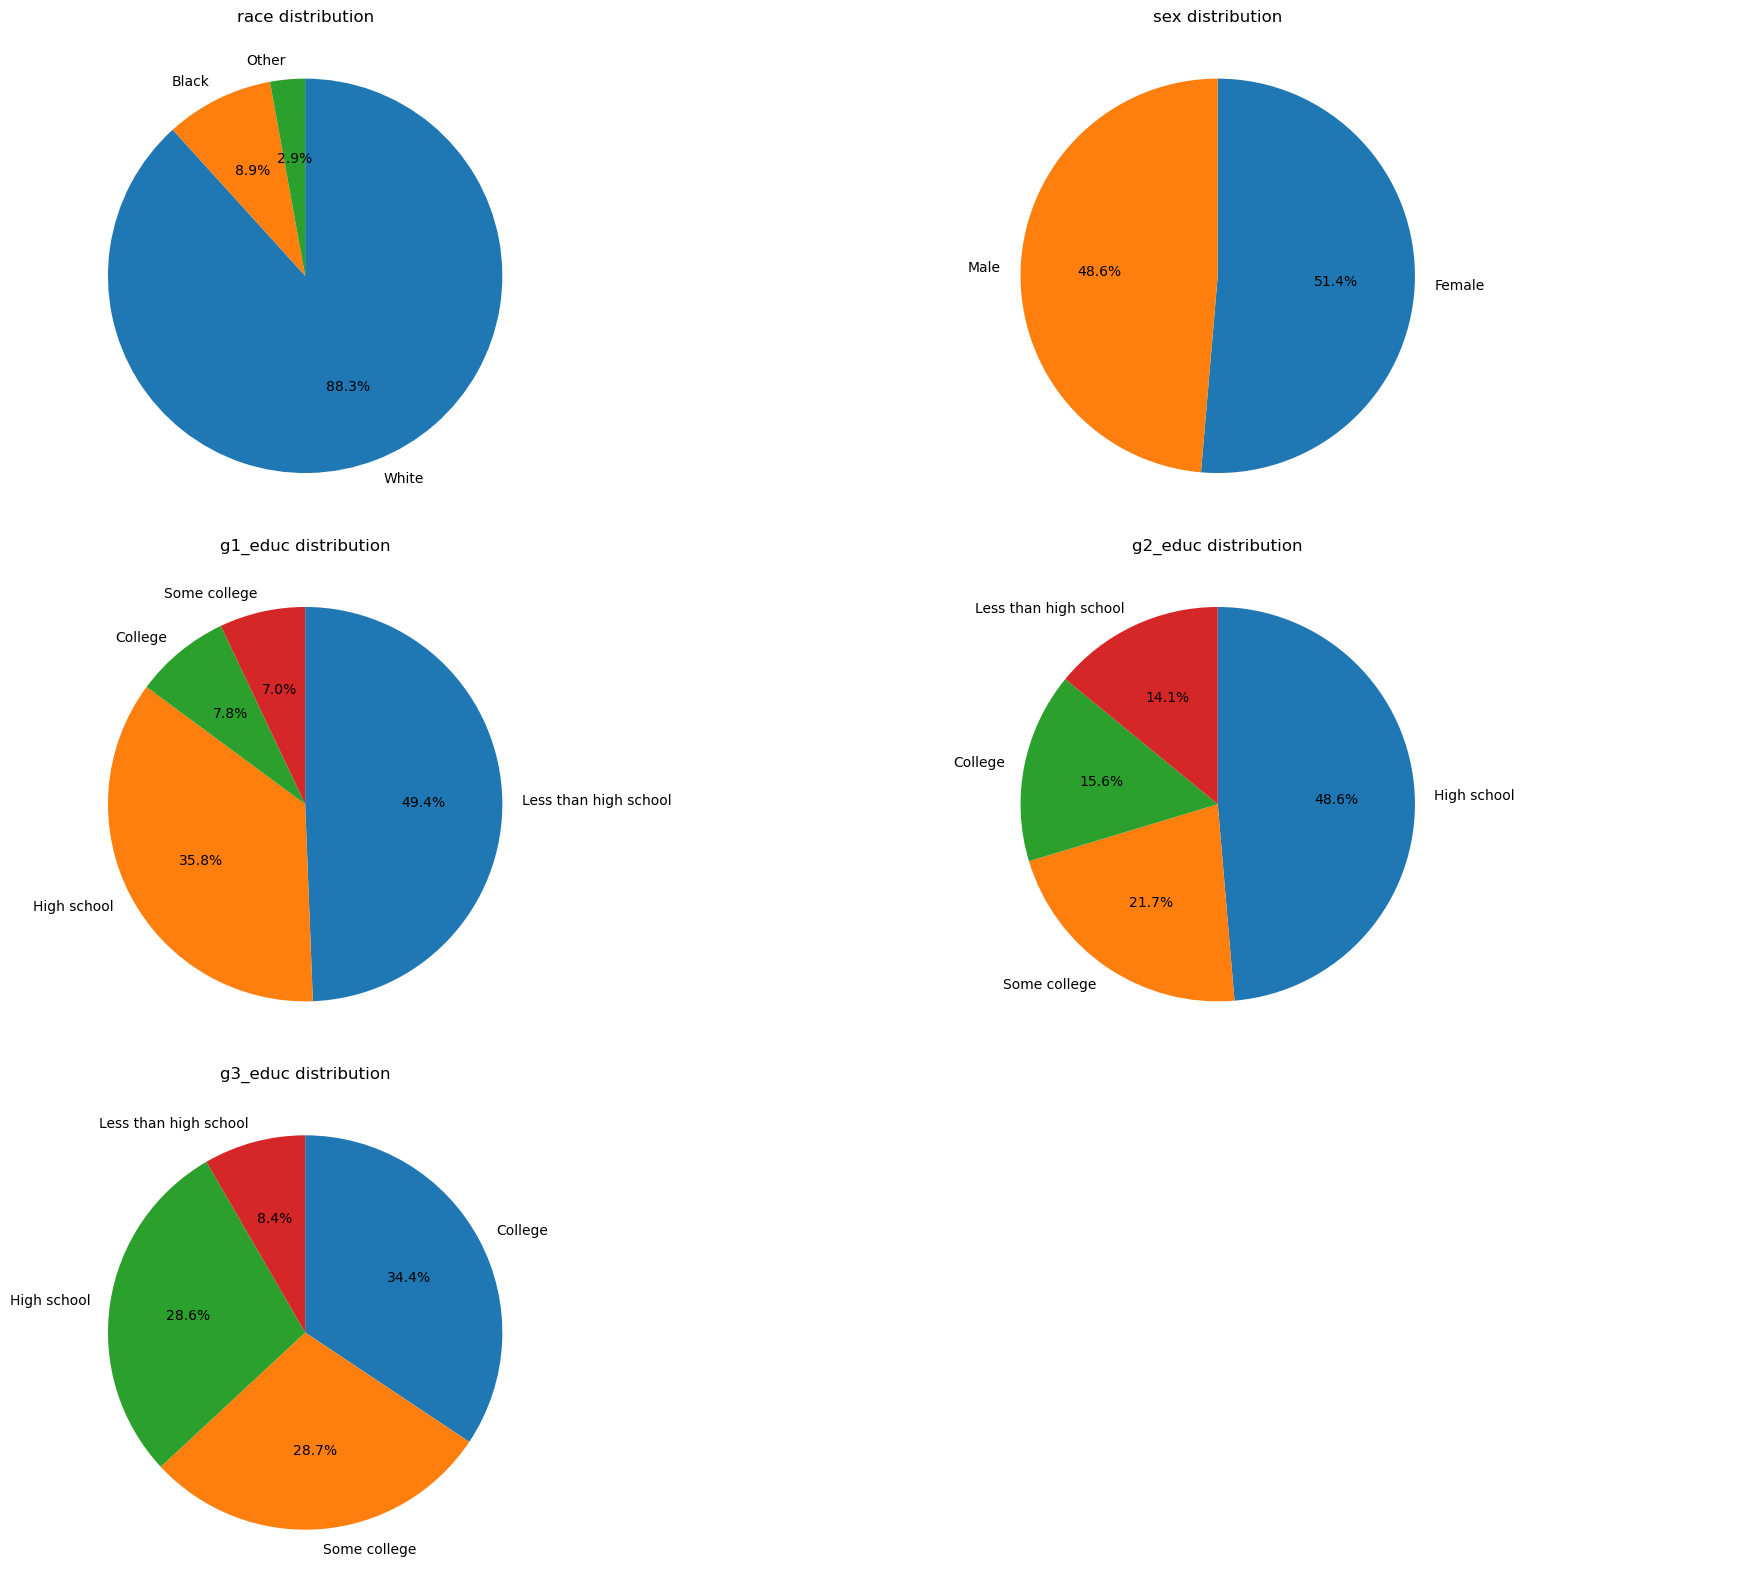

In [ ]:
#use pie charts to analysis categorical variables
_,ax=plt.subplots(3,2,figsize=(20,16))
for i in range(5):
    col=['race','sex','g1_educ','g2_educ','g3_educ'][i]
    counts = learning[col].value_counts()
    nrow,ncol=divmod(i,2)
    counts.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False,ax=ax[nrow,ncol])
    ax[nrow,ncol].set_ylabel('')
    ax[nrow,ncol].set_title(col+' distribution')

ax[2,1].axis('off')
plt.tight_layout()
plt.show()

由上述pie图我们可以得知，数据样本性别分布比较均衡，但是种族上主要以白人为主。  
除此之外，从第一代到第三代，代际之间的教育进步还是比较明显的。

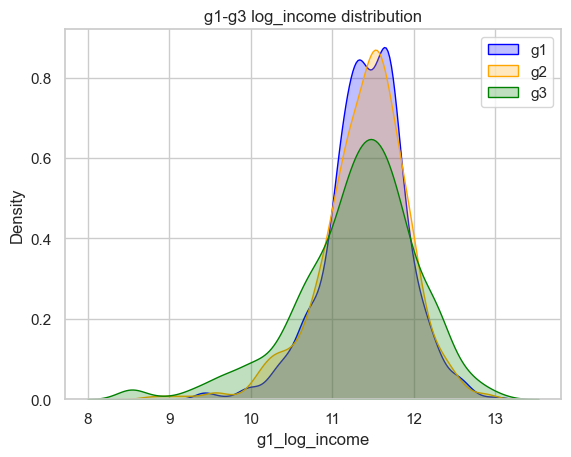

In [4]:
#use kde plots to analysis continuous variables
sns.set_theme(style='whitegrid')
plt.figure()
sns.kdeplot(data=learning, x='g1_log_income', fill=True, label='g1', color='blue')
sns.kdeplot(data=learning, x='g2_log_income', fill=True, label='g2', color='orange')
sns.kdeplot(data=learning, x='g3_log_income', fill=True, label='g3', color='green')
plt.legend()
plt.title('g1-g3 log_income distribution')
plt.show()

From the kernel density plots of log-transformed income across the three generations, we observe that the income distributions are approximately **unimodal and bell-shaped**, resembling a normal distribution. If we were to symmetrically reflect the lower half of each curve, the overall shape would resemble a **spindle-shaped distribution**, commonly used to describe societies with a strong middle-income segment.

However, a closer comparison reveals that the **peak of the third generation's distribution is notably lower** than those of the first and second generations. This suggests a **shrinking proportion of the middle-income group** and a corresponding **increase in income inequality** in the younger generation.


#### <a id='toc1_3_2_2_'></a>[Multivariate Distribution Analysis by Grouping Variables](#toc0_)

Next, we examine how explanatory variables affect the distribution of the dependent variable by grouping them and visualizing the differences. This allows us to intuitively understand the impact of different factors on the outcome variable.

We use **violin plots** to explore the distribution of the dependent variable across various subgroups. Violin plots enable us to visualize both the distribution and density of a variable within categories. By setting `x` and `hue` parameters, we can perform layered grouping. For instance, setting `x='race'` and `hue='sex'` divides the data into six subgroups based on race and gender, displaying the corresponding kernel density estimates vertically.

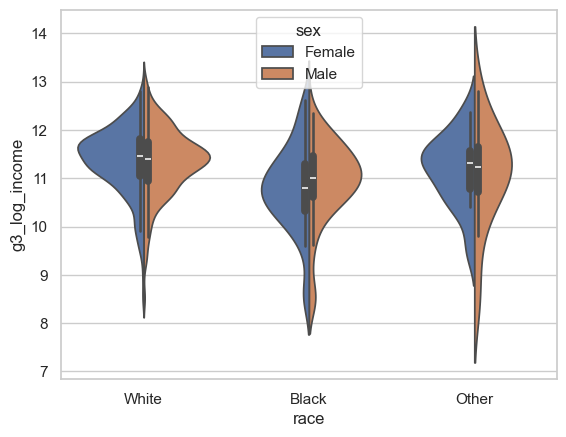

In [ ]:
sns.violinplot(data=learning,x='race',y='g3_log_income',hue='sex',split=True);

From the plot, we observe that the **White population**, which forms the majority of the sample, shows nearly symmetric distributions for male and female groups. This suggests that **gender differences in third-generation income are relatively small** overall.

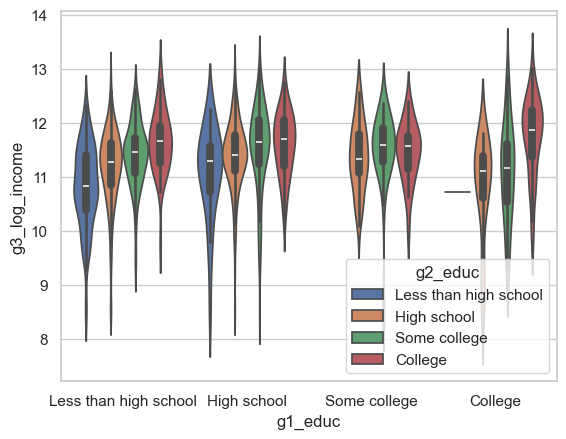

In [6]:
sns.violinplot(data=learning,x='g1_educ',y='g3_log_income',hue='g2_educ');

Additionally, we notice that **educational attainment in the second generation has a significant influence** on the income of the third generation. Within each fixed category of first-generation education, the violin plots corresponding to different levels of second-generation education exhibit an upward trend—indicating **intergenerational educational gains are associated with income improvements**.

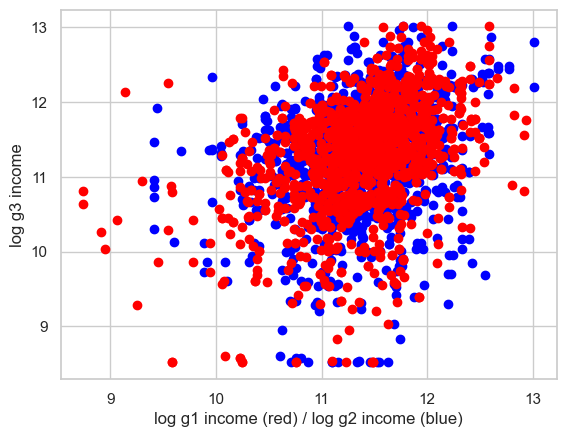

In [9]:
plt.figure()
plt.scatter(data=learning,x='g1_log_income',y='g3_log_income',color='blue');  #第一代对数收入与第三代对数收入的散点图用蓝色
plt.scatter(data=learning,x='g2_log_income',y='g3_log_income',color='red');  #第二代对数收入与第三代对数收入的散点图用红色
plt.xlabel('log g1 income (red) / log g2 income (blue)')
plt.ylabel('log g3 income')
plt.show()

Finally, the **scatter plot of log-transformed income across three generations** reveals a **clear positive correlation** between the income of the first generation, the second generation, and that of the third generation.

### <a id='toc1_3_3_'></a>[Feature Engineering](#toc0_)

In the feature engineering stage, we performed the following key tasks:

- **Categorical Variable Encoding**:
  - For **ordinal categorical variables**, such as educational attainment, we applied **label encoding**. Each education level was mapped to an integer (1, 2, 3, 4) based on its rank, thereby preserving the inherent order among categories.
  - For **nominal categorical variables**, such as sex and race, we used **one-hot encoding** to generate binary indicator variables. For example, the `sex` variable was transformed into a `female` dummy variable, where `1` represents female and `0` represents male. To avoid **multicollinearity**, we dropped one category from each set of dummy variables.

  After encoding, we constructed the feature matrix **X** and the target variable **y**.

- **Construction of Intergenerational Features**:
  We introduced additional variables to capture:
  - **Educational mobility**: the differences in education levels across generations (e.g., G1 to G2, G2 to G3),
  - **Income mobility**: the change and relative growth in income between generations,
  - **Interaction terms**: combining education and income to reflect compound effects (e.g., `education × log(income)`).

  These new features were included in an expanded feature set, denoted as **X_add**.

- **Correlation Analysis and Heatmap Visualization**:
  To guide feature selection for subsequent modeling, we computed the **Pearson correlation coefficients** between all features and the target variable. A **heatmap** was then used to visualize the correlation structure and identify variables with strong explanatory power.


In [ ]:
#Categorical Variable Encoding:learning_new
learning_new=learning.copy()
learning_new

learning_new['female']=(learning_new['sex']=='Female').map({True:1,False:0})
learning_new['White']=(learning_new['race']=='White').map({True:1,False:0})
learning_new['Black']=(learning_new['race']=='Black').map({True:1,False:0})

for col in ['g1_educ','g2_educ','g3_educ']:
    learning_new[col]=learning_new[col].map({'Less than high school':1,'High school':2,'Some college':3,'College':4})

learning_new=learning_new.drop(['g1_id','g2_id','sex','race'],axis=1)
learning_new.set_index(['g3_id'],inplace=True)
display(learning_new.head())

##constructed X and y.
X=learning_new.drop(['g3_log_income'],axis=1)
y=learning_new[['g3_log_income']]

,g1_educ,g2_educ,g3_educ,g1_log_income,g2_log_income,g3_log_income,female,White,Black
g3_id,,,,,,,,,
1,1,1,2,10.898823,11.274951,10.742104,1,1,0
4,1,2,3,10.898823,12.051807,11.526852,1,1,0
7,1,2,2,10.898823,11.385779,11.239182,1,1,0
9,1,1,2,10.663043,11.274951,10.742104,1,1,0
10,1,1,2,10.663043,11.274951,10.719895,0,1,0


In [18]:
#Construction of Intergenerational Features
X_add=X.copy()

##Educational mobility
X_add['g1_g2_educ_diff']=X_add['g1_educ']-X_add['g2_educ']
X_add['g2_g3_educ_diff']=X_add['g2_educ']-X_add['g3_educ']

##Income mobility
X_add['g1_g2_income_diff'] = X_add['g2_log_income'] - X_add['g1_log_income']
X_add['income_mobility'] = (X_add['g2_log_income'] - X_add['g1_log_income']) / X_add['g1_log_income']

##Interaction terms
X_add['g1_edu_income'] = X_add['g1_educ'] * X_add['g1_log_income']
X_add['g2_edu_income'] = X_add['g2_educ'] * X_add['g2_log_income']

,g3_log_income
g1_educ,0.112620
g2_educ,0.285622
g3_educ,0.398235
g1_log_income,0.241780
g2_log_income,0.402636
female,0.014478
White,0.183904
Black,-0.185610
g1_g2_educ_diff,-0.159015
g2_g3_educ_diff,-0.130988


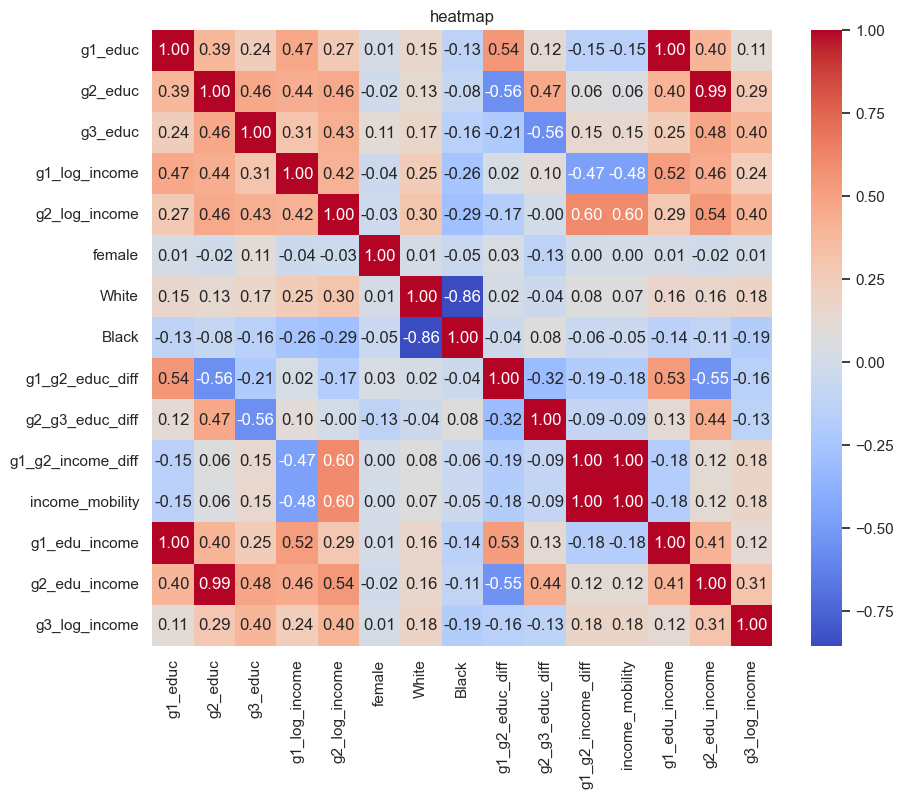

In [ ]:
#Correlation Analysis and Heatmap Visualization

##compute the correlation coefficient
learning_sum=pd.merge(X_add,y,left_index=True,right_index=True)
display(learning_sum.corr()[['g3_log_income']])

##draw the heatmap of the correlation coefficient
plt.figure(figsize=(10,8))
sns.heatmap(learning_sum.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('heatmap')
plt.show()

### <a id='toc1_3_4_'></a>[Regression Engineering](#toc0_)

In this section, we conduct regression analysis to estimate the **causal effect** of our key explanatory variable—second-generation income—on the outcome variable: third-generation income. The basic form of our regression model is:

$$
\ln y_{3,i} = \alpha + \beta \ln y_{2,i} + \gamma X_i + \varepsilon_i
$$

Where:
- $ \ln y_{3,i} $: Log income of the third generation  
- $ \ln y_{2,i} $: Log income of the second generation  
- $ X_i $: Control variables (other socioeconomic features)  
- $ \beta $: The coefficient of interest, representing the **intergenerational income elasticity (IGE)**

We construct four models with increasing complexity, based on different sets of features:

- **Model A**: Includes only second- and third-generation features  
- **Model B**: Includes features from all three generations(that is **X**) 
- **Model C**: Includes selected features from an extended set (**X_add**) based on correlation analysis  
- **Model D**: Includes all engineered and constructed features from feature engineering(that is **X_add**)

We focus primarily on the value and significance of $ \beta $ across these models for interpretation and comparison.

All models are implemented using the `statsmodels` module in Python. After performing the regressions, we report the **adjusted $ R^2 $**, regression coefficients, and statistically significant variables at the **5% significance level**.


In [ ]:
# model A : only use second- and third-generation features to  regress
import statsmodels.api as sm

X_const = sm.add_constant(X.drop(['g1_educ','g1_log_income'],axis=1))  # add the constant
model = sm.OLS(y, X_const).fit(cov_type='HC3')   #use the Robust Standard Errors which is more universal

## output the coefficient ,SER and t value
res_A = pd.DataFrame({
    'coef': model.params,
    'std_err': model.bse,
    't_value': model.tvalues
})

R2_adj_A=model.rsquared_adj
signfea_A=res_A.loc[abs(res_A['t_value']>1.96)].sort_values(by='coef',ascending=False)['coef'].drop('const')
## output the adjusted R2 ,the result and the feature variable that passed the 5% significance test
print(R2_adj_A)
display(res_A)
signfea_A

0.22592887864821198


,coef,std_err,t_value
const,6.814955,0.454119,15.006988
g2_educ,0.036236,0.022640,1.600554
g3_educ,0.196218,0.023198,8.458545
g2_log_income,0.337969,0.042285,7.992657
female,-0.011988,0.035762,-0.335221
White,0.006120,0.125718,0.048682
Black,-0.172928,0.140513,-1.230692


g2_log_income    0.337969
g3_educ          0.196218
Name: coef, dtype: float64

In Model A, we find that `g2_log_income` and `g3_educ` are both significant at the 5% level, with $ \beta \approx 0.34 $. To streamline the workflow, we encapsulated the modeling procedure into a reusable function and applied it across the remaining three models.

In [ ]:
#encapsulated the modeling procedure into a reusable function
def reg(X,y):
    
    X_const = sm.add_constant(X) 
    model = sm.OLS(y, X_const).fit(cov_type='HC3')

    result_df = pd.DataFrame({
        'coef': model.params,
        'std_err': model.bse,
        't_value': model.tvalues
    })
    signfea=result_df.loc[abs(result_df['t_value'])>1.96].sort_values(by='coef',ascending=False)['coef'].drop('const')

    return X_const,model,model.rsquared_adj,result_df,signfea    

In [ ]:
# model B: use features from all three generations to regress
X_const_B,model_B,R2_adj_B,res_B,signfea_B=reg(X,y)
print(R2_adj_B)
display(res_B)
signfea_B

0.22885617878274034


,coef,std_err,t_value
const,6.050393,0.584390,10.353343
g1_educ,-0.056401,0.024863,-2.268454
g2_educ,0.040905,0.023853,1.714891
g3_educ,0.195877,0.023206,8.440814
g1_log_income,0.080162,0.044155,1.815457
g2_log_income,0.330977,0.043368,7.631769
female,-0.006650,0.035863,-0.185434
White,0.019923,0.125375,0.158912
Black,-0.148967,0.140978,-1.056663


g2_log_income    0.330977
g3_educ          0.195877
g1_educ         -0.056401
Name: coef, dtype: float64

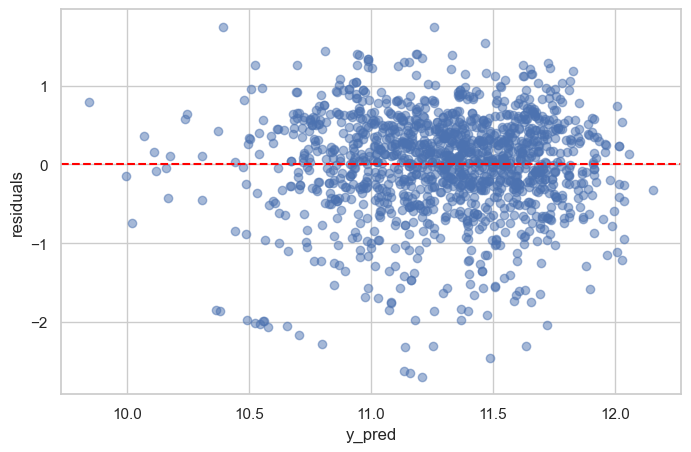

In [127]:
# draw the residual plot of model B
## predicted value
y_pred = model_B.predict(X_const_B)

# residual
residuals = y.values.ravel() - y_pred.ravel()

# residual plot

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('y_pred')
plt.ylabel('residuals')
plt.show()

In [ ]:
# find the important feature variable in X_add (correlation coefficient greater than 0.2)
im_fe=[i for i in learning_sum.corr().loc[learning_sum.corr()['g3_log_income']>=0.2,['g3_log_income']].index if i != 'g3_log_income']
im_fe

['g2_educ', 'g3_educ', 'g1_log_income', 'g2_log_income', 'g2_edu_income']

In [ ]:
# model C: use selected features from an extended set to regress
_,_,R2_adj_C,res_C,signfea_C=reg(X_add[im_fe],y)
print(R2_adj_C)
display(res_C)
signfea_C

0.2239834125729281


,coef,std_err,t_value
const,5.210446,1.042719,4.996980
g2_educ,0.381142,0.412405,0.924192
g3_educ,0.196199,0.023125,8.484383
g1_log_income,0.060264,0.041515,1.451614
g2_log_income,0.419651,0.091623,4.580182
g2_edu_income,-0.031109,0.035463,-0.877222


g2_log_income    0.419651
g3_educ          0.196199
Name: coef, dtype: float64

In [ ]:
# model D : use all engineered and constructed features from feature engineering to regress
X_const_D,model_D,R2_adj_D,res_D,signfea_D=reg(X_add,y)
print(R2_adj_D)
display(res_D)
signfea_D

0.22942349439489051


,coef,std_err,t_value
const,5.006762,1.228361,4.075970
g1_educ,0.335409,0.385617,0.869798
g2_educ,0.226378,0.229891,0.984719
g3_educ,0.211197,0.114656,1.842000
g1_log_income,0.554986,0.215314,2.577563
g2_log_income,-0.052736,0.199841,-0.263890
female,-0.006054,0.035800,-0.169095
White,0.002848,0.127240,0.022380
Black,-0.166327,0.142263,-1.169152
g1_g2_educ_diff,0.109031,0.299856,0.363610


g1_log_income    0.554986
Name: coef, dtype: float64

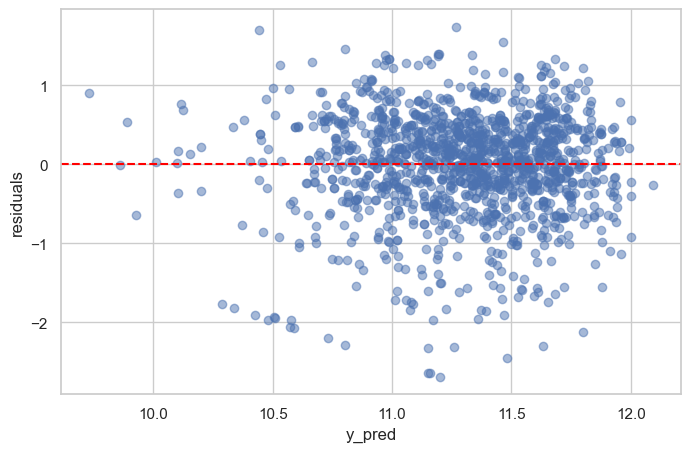

In [126]:
#draw the residual plot of model D

y_pred = model_D.predict(X_const_D)

residuals = y.values.ravel() - y_pred.ravel()

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('y_pred')
plt.ylabel('residuals')
plt.show()

**Residual Analysis：**

In addition to reporting the regression results, we performed **residual diagnostics** for **Model B** and **Model D**. In both cases, the residuals are centered around zero, supporting the OLS assumption of **zero mean errors**. No systematic patterns are observed, indicating that **non-linearity is not a concern**. While some degree of **heteroskedasticity** is present, we use **robust standard errors** in all regressions. Moreover, we observe greater variance in the region $ [11.0, 11.5] $, which corresponds to a concentration of sample points—hence the wider spread in residuals is understandable.


In [122]:
RESSUM=pd.DataFrame({
    'R2_adj':[R2_adj_A,R2_adj_B,R2_adj_C,R2_adj_D],
    'beta':[res_A.loc['g2_log_income','coef'],res_B.loc['g2_log_income','coef'],res_C.loc['g2_log_income','coef'],res_D.loc['g2_log_income','coef']],
    '5 % significance':[res_A.loc['g2_log_income','t_value']>1.96,res_B.loc['g2_log_income','t_value']>1.96,res_C.loc['g2_log_income','t_value']>1.96,res_D.loc['g2_log_income','t_value']>1.96]
},index=['mdoelA','modelB','modelC','modelD'])

RESSUM

,R2_adj,beta,5 % significance
mdoelA,0.225929,0.337969,True
modelB,0.228856,0.330977,True
modelC,0.223983,0.419651,True
modelD,0.229423,-0.052736,False


**Summary：**

The following table summarizes the results of the four models (not shown here but referenced in the full report). Across all models, we find that the **adjusted $ R^2 $ remains relatively stable**, suggesting that model complexity and feature count do not significantly improve explanatory power. This consistency, along with the residual analysis, indicates that our model specification is generally appropriate and robust.

However, in **Model D**, we observe that the coefficient $ \beta $ becomes **statistically insignificant and changes sign**, diverging substantially from earlier estimates. This is likely due to the inclusion of several **engineered features** that absorb part of the explanatory power previously attributed to `g2_log_income`. For example, the variable `income_mobility`, which is constructed from `g2_log_income`, is statistically significant and has a relatively large coefficient—indicating it may have "captured" the variance that would otherwise be associated with the original income variable.

Given the conceptual definition of intergenerational income elasticity, **Model C and Model D are not suitable for estimating $ \beta $**, as they contain variables derived from or closely related to `g2_log_income`, which introduces redundancy and distorts the interpretation of direct effects.

Therefore, we focus on **Model A** and **Model B** as the appropriate models for estimating IGE. From these, we conclude that the **intergenerational income elasticity in the U.S. is approximately 0.33**, implying an **income mobility of 1 − 0.33 = 0.67**. This result aligns well with estimates reported in the existing economic literature.


### <a id='toc1_3_5_'></a>[Predictive Engineering](#toc0_)

In this section, we shift our focus from causal inference to predictive modeling, where the primary objective is to assess how well the feature vectors can predict the target variable.

In the previous regression analysis, our emphasis was not on metrics such as $ R^2 $ or accuracy, but rather on identifying causal relationships—especially the estimation of intergenerational income elasticity (IGE). However, in predictive modeling, we are more concerned with **model performance**, especially:

- **$ R^2 $** (coefficient of determination), which reflects the proportion of variance in the target variable that can be explained by the features in a regression model.
- **Accuracy**, which measures the prediction success rate in classification models.

In addition, we focus on a model's **generalization ability**—its performance on unseen data. To this end, we adopt **holdout validation** and **cross-validation** to obtain unbiased estimates of model performance. Thus, generalized $ R^2 $ and accuracy will be our key evaluation metrics in the predictive stage.

#### <a id='toc1_3_5_1_'></a>[Baseline Prediction(Standard Prediction)](#toc0_)

We begin with standard predictive modeling without additional preprocessing or feature transformation. Using the constructed feature sets, we apply the following regressors:

- **Linear Regression**
- **Decision Tree Regressor**
- **Random Forest Regressor**

Each model is evaluated using multiple feature configurations.


##### <a id='toc1_3_5_1_1_'></a>[Linear Regression](#toc0_)

We build three linear regression models, each using a different set of features:

- **LR1**: Features with Pearson correlation $ \geq 0.2 $ with the target variable (that is `im_fe` )
- **LR2**: The full feature set X (constructed from raw and encoded features)  
- **LR3**: The extended feature set X_add (including engineered and interaction terms)

For each model, we report:

- The **training $ R^2 $ score**
- The **Mean Squared Error (MSE)**
- The **generalization score** (based on cross-validation)
- A **scatter plot** comparing predicted vs. actual values  
  - **Blue dots** represent actual values  
  - **Orange dots** represent model predictions

These evaluations help us understand how well different feature sets and modeling approaches perform in predicting third-generation income.


In [ ]:
#def generalization score by corss validation 
from sklearn.model_selection import cross_val_score
def cvs(model,X,y,cv=5,scoring='r2'):
    return cross_val_score(model,X,y,cv=cv,scoring=scoring).mean()

0.22682804815733848 0.6486025712926902 0.21268092019969959


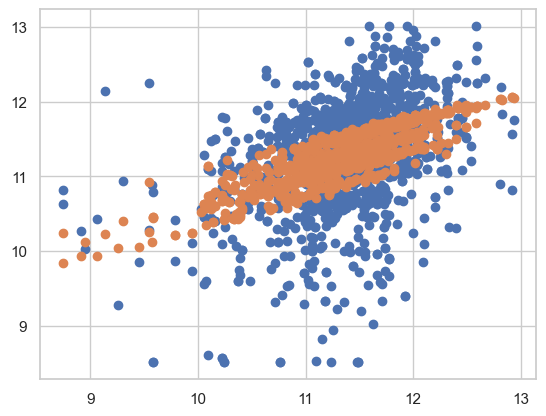

In [130]:
#lr1
from sklearn import linear_model
from sklearn import metrics
lr1=linear_model.LinearRegression()
lr1.fit(X_add[im_fe],y)
cvs1 = cvs(linear_model.LinearRegression(), X_add[im_fe], y)

print(
lr1.score(X_add[im_fe],y),  #the training score
metrics.root_mean_squared_error(y,lr1.predict(X_add[im_fe])), #mse
cvs1 # the generalization score
)


plt.scatter(data=learning,x='g2_log_income',y='g3_log_income')
plt.scatter(x=X_add['g2_log_income'],y=lr1.predict(X_add[im_fe]))
plt.show()

0.23337901644383907 0.6458489707344869 0.21136279698381943


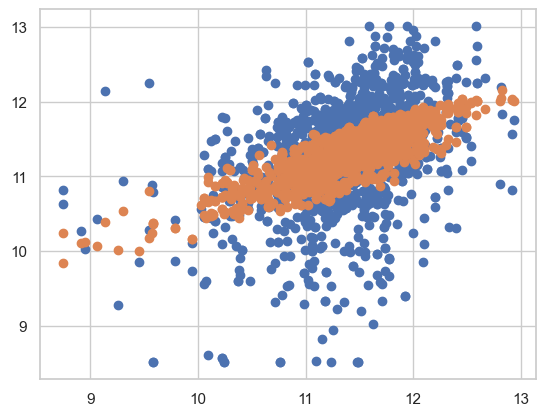

In [131]:
#lr2
lr2=linear_model.LinearRegression()
lr2.fit(X,y)
cvs2 = cvs(linear_model.LinearRegression(), X, y)

print(
lr2.score(X,y),
metrics.root_mean_squared_error(y,lr2.predict(X)),
cvs2
)

plt.scatter(data=learning,x='g2_log_income',y='g3_log_income')
plt.scatter(x=X['g2_log_income'],y=lr2.predict(X))
plt.show()

In [132]:
#see the cefficinets in lr2
pd.DataFrame({'var':X.columns,'coef':list(lr2.coef_[0])}).sort_values(by='coef',ascending=False)

,var,coef
4,g2_log_income,0.330977
2,g3_educ,0.195877
3,g1_log_income,0.080162
1,g2_educ,0.040905
6,White,0.019923
5,female,-0.006650
0,g1_educ,-0.056401
7,Black,-0.148967


0.23563782105299613 0.6448967904190583 0.20877562026361937


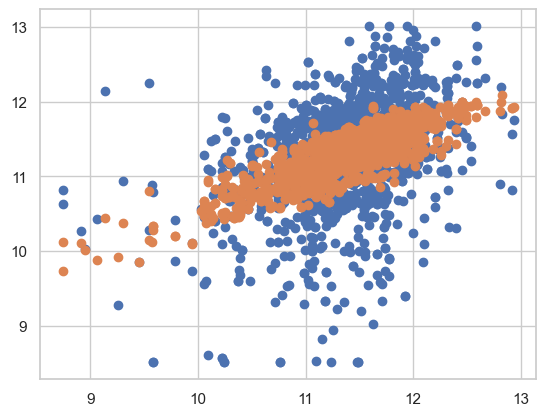

In [134]:
#lr3
lr3=linear_model.LinearRegression()
lr3.fit(X_add,y)
cvs3 = cvs(linear_model.LinearRegression(), X_add, y)

print(
lr3.score(X_add,y),
metrics.root_mean_squared_error(y,lr3.predict(X_add)),
cvs3
)

plt.scatter(data=learning,x='g2_log_income',y='g3_log_income')
plt.scatter(x=X_add['g2_log_income'],y=lr3.predict(X_add))
plt.show()

In [ ]:
#see the cefficinets in lr3
pd.DataFrame({'var':X_add.columns,'coef':list(lr3.coef_[0])}).sort_values(by='coef',ascending=False)

,var,coef
11,income_mobility,11.356835
3,g1_log_income,0.554986
0,g1_educ,0.335409
1,g2_educ,0.226378
2,g3_educ,0.211197
8,g1_g2_educ_diff,0.109031
9,g2_g3_educ_diff,0.015182
6,White,0.002848
5,female,-0.006054
13,g2_edu_income,-0.007911


##### <a id='toc1_3_5_1_2_'></a>[Decision Tree Regression](#toc0_)

When using a decision tree for prediction, we define two evaluation metrics:

- **$ s_f $**: the model’s in-sample fit score (training performance)
- **$ s_g $**: the model’s out-of-sample generalization score, obtained via cross-validation using the `cross_val_score` function

This scoring system allows for a clear comparison between fitting performance and generalization ability.

In [ ]:
#simultaneous fitting and generalization for X
from sklearn import tree 
s_f=[]
s_g=[]
for i in range(2,15):
    dt=tree.DecisionTreeRegressor(max_depth=i)  #use max_depth to adjust model 
    dt.fit(X,y)
    s_fit=dt.score(X,y)
    s_gen=cvs(tree.DecisionTreeRegressor(max_depth=i),X,y)
    s_f.append(s_fit)
    s_g.append(s_gen)

pd.DataFrame({'s_f':s_f,'s_g':s_g},index=range(2,15))

,s_f,s_g
2,0.199440,0.160922
3,0.249837,0.176442
4,0.284237,0.158038
5,0.329044,0.079749
6,0.387822,0.010915
7,0.449774,-0.086416
8,0.517514,-0.205539
9,0.588287,-0.254358
10,0.648922,-0.293351
11,0.696274,-0.368819


As expected, as the tree depth increases, the model becomes more complex—leading to **improved training performance** but **diminished generalization performance** due to overfitting. Based on our cross-validation results, the best trade-off is achieved when **`max_depth = 3`**.

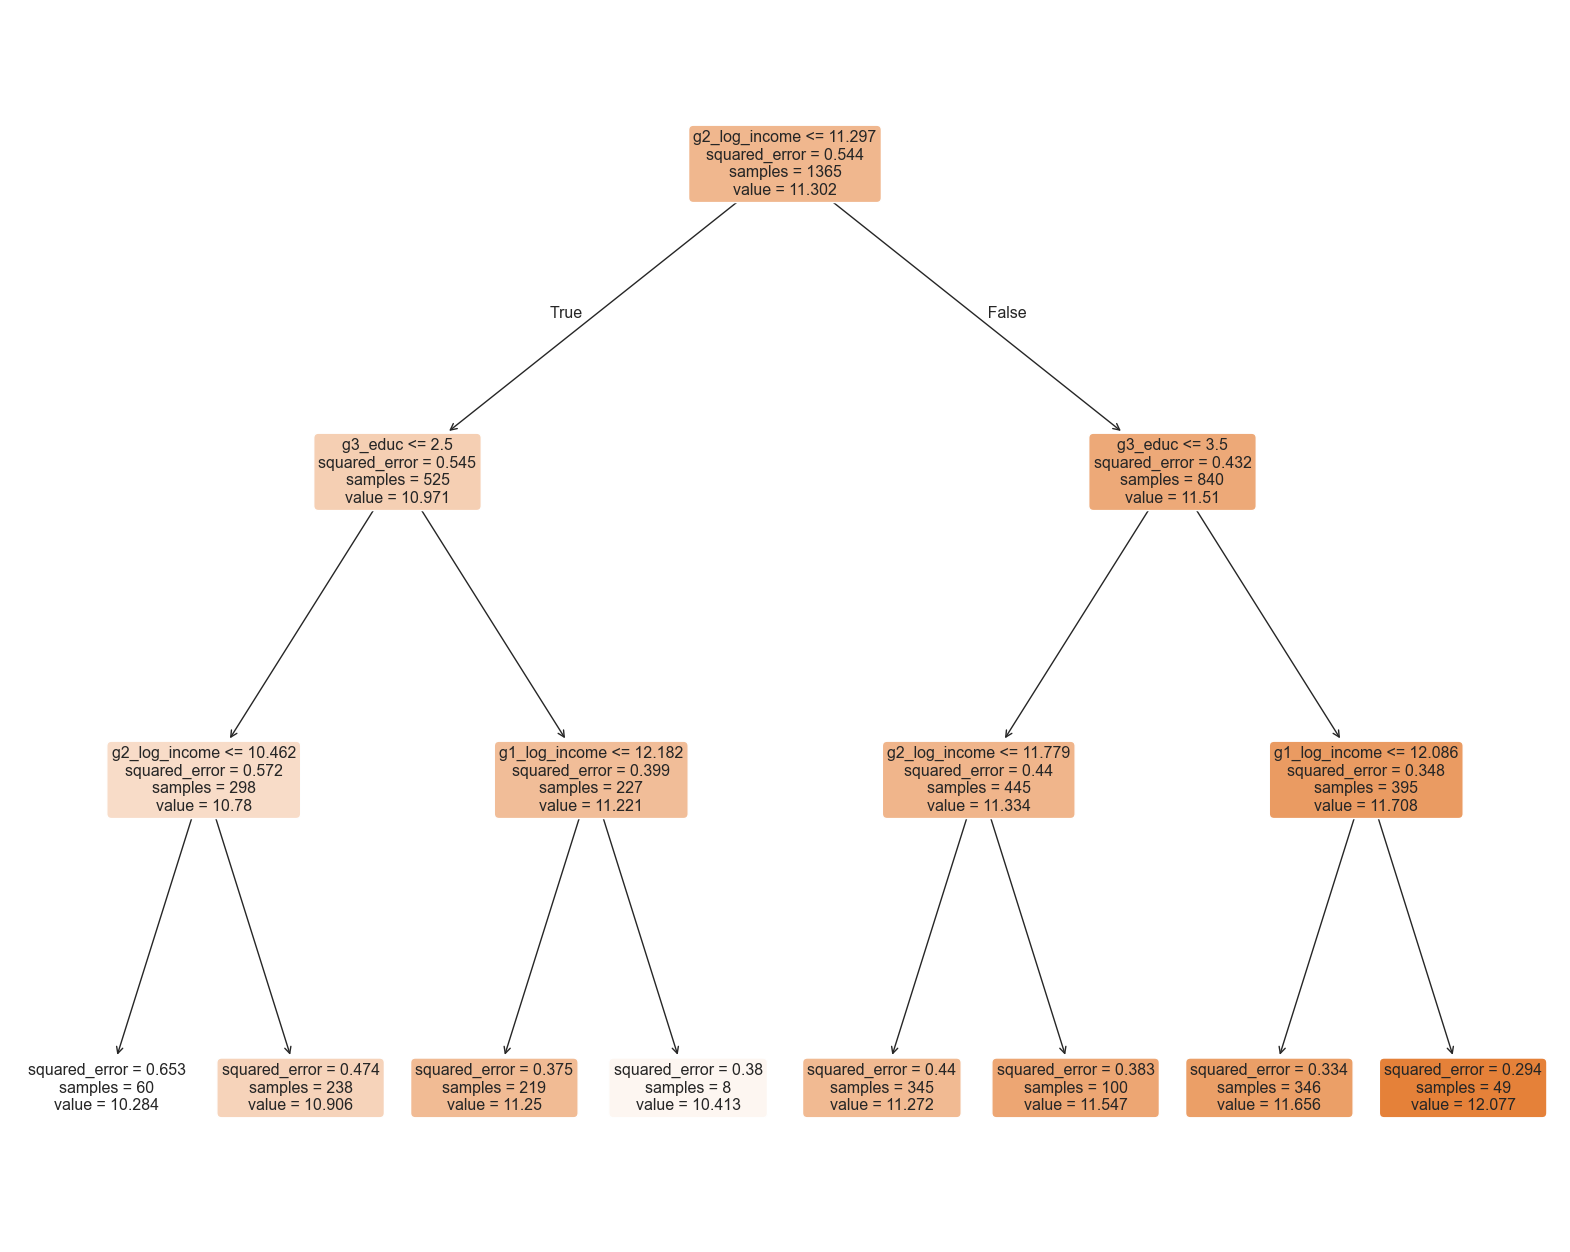

In [139]:
dt=tree.DecisionTreeRegressor(max_depth=3)
dt.fit(X,y)

plt.figure(figsize=(20,16))
tree.plot_tree(dt,feature_names=X.columns,filled=True,rounded=True)
plt.show()

At this depth, we examine the tree structure and find that the three most important features influencing third-generation income are:

1. **Second-generation income**
2. **Third-generation education**
3. **First-generation income**

These features appear in the top splits of the decision tree and result in the most substantial reductions in impurity, indicating their strong predictive power.

In [ ]:
#simultaneous fitting and generalization for X_add
s_f=[]
s_g=[]
for i in range(3,21):
    td=tree.DecisionTreeRegressor(max_depth=i)
    td.fit(X_add,y)
    s_fit=td.score(X_add,y)
    s_gen=cross_val_score(tree.DecisionTreeRegressor(max_depth=i),X,y,cv=5,scoring='r2').mean()
    s_f.append(s_fit)
    s_g.append(s_gen)

pd.DataFrame({'s_f':s_f,'s_g':s_g},index=range(3,21))

,s_f,s_g
3,0.251024,0.176442
4,0.288647,0.158038
5,0.338395,0.053237
6,0.413199,0.008544
7,0.489991,-0.073021
8,0.560251,-0.208683
9,0.635655,-0.246024
10,0.706738,-0.324938
11,0.770672,-0.361473
12,0.826478,-0.446425


##### <a id='toc1_3_5_1_3_'></a>[Random Forest Regression](#toc0_)

Based on our previous experiments, we found that including extended features (i.e., **X_add**) did not significantly improve model performance in predictive tasks.

To streamline the modeling process and reduce complexity, we therefore **omit X_add in subsequent random forest models**, and proceed with the original feature set (**X**).

This decision balances performance and interpretability while avoiding unnecessary feature redundancy.


In [ ]:
#Automatically find the optimal parameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## def the param_grid
param_grid = {
    'n_estimators': [ 200, 300,500],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## construct GridSearchCV object
gs_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

## automatically find the optimal parameters and fit
gs_rf.fit(X, y.values.ravel())

print("The best parameters is ", gs_rf.best_params_)
print("The best generalization score is ", gs_rf.best_score_)  

The best parameters is  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
The best generalization score is  0.20844625081493362


In [ ]:
#output the fitting score(training score) and MSE
print('The fitting score is '+str(gs_rf.score(X,y)))
print('The MSE is '+str(metrics.root_mean_squared_error(y,gs_rf.predict(X))))

The fitting score is 0.3244372659456458
The MSE is 0.6062803085156329


#### <a id='toc1_3_5_2_'></a>[Standardized Prediction](#toc0_)

The performance of the baseline predictive models was not entirely satisfactory. As an alternative approach, we attempted to standardize income-related variables across generations to normalize the target distribution and improve model stability.

In this standardized prediction task, we follow a procedure similar to the baseline regression models, but this time we adopt a **pipeline-based workflow** to streamline the preprocessing and model training steps.

##### <a id='toc1_3_5_2_1_'></a>[Decision Tree Regression](#toc0_)

In [ ]:
#construct pipeline which named pl1
#use the holdout method to test samples and output the model score
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

##split the train sample and test sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##standardized the data(only continuous variable)
ct = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), ['g1_log_income', 'g2_log_income'])
    ],
    remainder='passthrough'  #keep the other columns unchanged
)

pl1 = Pipeline([
    ('scaler', ct),
    ('dt', DecisionTreeRegressor(max_depth=3))
])

model1 = TransformedTargetRegressor(
    regressor=pl1,
    transformer=StandardScaler()
)
model1.fit(X_train, y_train)
model1.score(X_test,y_test)

0.24184969480925222

In [ ]:
#use the GirdSearchCV method to find the optimal parameters for the pl2 pipeline
from sklearn.model_selection import GridSearchCV

param_grid={
    'regressor__dt__max_depth':range(2,7)
}

gs_pl1=GridSearchCV(model1,param_grid=param_grid,cv=5)
gs_pl1.fit(X,y)

print(f"Best parameters: {gs_pl1.best_params_}")
print(f"Best score: {gs_pl1.best_score_}")

Best parameters: {'regressor__dt__max_depth': 3}
Best score: 0.1764423990411756


##### <a id='toc1_3_5_2_2_'></a>[Random Forest Regression](#toc0_)

In [ ]:
#construct pipeline which named pl2
#use the holdout method to test samples and output the model score
#use the GirdSearchCV method to find the optimal parameters for the pl2 pipeline
from sklearn.ensemble import RandomForestRegressor
pl2 = Pipeline([
    ('scaler', ct),
    ('rf', RandomForestRegressor())
])

model2 = TransformedTargetRegressor(
    regressor=pl2,
    transformer=StandardScaler()
)


param_grid = {
    'regressor__rf__n_estimators': [ 200, 300,500],
    'regressor__rf__max_depth': [4, 6, 8, 10],
    'regressor__rf__min_samples_split': [2, 5, 10],
    'regressor__rf__min_samples_leaf': [1, 2, 4]
}

gs_pl2=GridSearchCV(model2,param_grid=param_grid,cv=5)
gs_pl2.fit(X,y)

print(f"Best parameters: {gs_pl2.best_params_}")
print(f"Best score: {gs_pl2.best_score_}")

Best parameters: {'regressor__rf__max_depth': 4, 'regressor__rf__min_samples_leaf': 1, 'regressor__rf__min_samples_split': 2, 'regressor__rf__n_estimators': 200}
Best score: 0.21041530249833426


Despite the transformation, the model's predictive power remains limited. The **generalized $ R^2 $ stays between 0.2 and 0.3**, indicating that **standardization does not significantly improve the generalization performance**. 

This finding suggests that there may be **residual variation in income that cannot be captured by the current feature set**. In other words, the explanatory power of the observable variables may have reached its limit.

**Explanatory Power Exhaustion：**

Suppose we attempt to predict an individual’s income based only on variables such as gender and age. Even within the same subgroup (e.g., same gender and age), income can vary substantially, reflecting a high degree of residual impurity. This residual variation is due to **unobservable or unmeasured factors**, such as talent, effort, personality traits, or luck.

If the remaining variation in $ R^2 $ reflects nothing but this irreducible noise, then we can say the **explanatory power of the current feature set is exhausted**. In such cases, further improvements in model performance would require **introducing additional, meaningful features**, rather than further tuning of the existing model.

This aligns with our findings: despite using multiple generations’ income and education variables—along with interaction terms—the models are unable to achieve higher predictive accuracy, implying the presence of significant unobserved heterogeneity in income outcomes.


#### <a id='toc1_3_5_3_'></a>[Classification-Based Prediction](#toc0_)

Given that our regression models may have exhausted the explanatory power of the current features, we explore an alternative approach by **transforming the prediction task into a classification problem**.

Specifically, we discretize third-generation income into three ordered categories:

- **1**: Low income  
- **2**: Middle income  
- **3**: High income  

This conversion changes the task from continuous value prediction to **ordinal classification**.

The rationale behind this transformation is that **categorical prediction can reduce the impact of unobservable variation**. In regression, even small unexplained differences in income can lead to large residuals, but in classification, as long as the prediction falls within the correct category, the model is considered successful—even if the predicted value is not exact. This helps absorb unpredictable variance caused by factors outside the model.

1. **Constructing Feature Matrix `X_class` and Target Vector `y_class`**

   - We discretize the continuous third-generation log income variable into three ordinal categories:
     - **Class 1**: Low income  
     - **Class 2**: Middle income  
     - **Class 3**: High income
   - The resulting target vector is denoted as `y_class`.
   - The corresponding feature matrix `X_class` is constructed using the same set of explanatory variables previously defined in our regression models, excluding the original continuous target.


In [149]:
X_class=X.copy()
for col in ['g1_log_income','g2_log_income']:
    X_class[f'{col}_qcut'] = pd.qcut(X_class[col], 3, labels=[1, 2, 3])

X_class.drop(['g1_log_income','g2_log_income'],axis=1,inplace=True)

In [150]:
y_class=y.copy()
y_class['g3_log_income_qcut']=pd.cut(y['g3_log_income'],3,labels=[1,2,3])
y_class.drop(['g3_log_income'],axis=1,inplace=True)

In [151]:
from sklearn.model_selection import train_test_split
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

2. **One-vs-Rest Logistic Regression**

   - We train a set of binary logistic classifiers, each distinguishing one income class from the rest.
   - This decomposition allows the model to treat each class boundary independently and is suitable when classes are imbalanced or when interpretability of class-specific coefficients is desired.
   - Evaluation metrics such as accuracy, precision, and confusion matrix are used to assess performance.

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

#Construct One-vs-Rest Regression(In reality,it is a classifier.)
ovr_clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovr_clf.fit(X_class_train, y_class_train)

##Assess
accuracy = ovr_clf.score(X_class_test, y_class_test)
print(f"OvR Accuracy: {accuracy:.4f}")

OvR Accuracy: 0.6154


3. **Multinomial Logistic Regression**

   - Unlike one-vs-rest, the multinomial logistic regression estimates all classes simultaneously under a softmax framework.
   - This model is appropriate for **mutually exclusive** and **exhaustive** classes and tends to produce more stable estimates when class boundaries are not sharply defined.
   - We again evaluate the model using standard classification metrics and compare results with the previous model.

In [153]:
#Multinomial Logistic Regression(In reality,it is a classifier)
softmax_clf = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000
)
softmax_clf.fit(X_class_train, y_class_train)
print(f"Softmax Accuracy: {softmax_clf.score(X_class_test, y_class_test):.4f}")

Softmax Accuracy: 0.6117


4. **Random Forest Classification**

   - We apply a tree-based ensemble method to capture potential nonlinear relationships among variables.
   - Random forests are robust to overfitting and handle feature interactions implicitly, making them well-suited for structured tabular data.
   - We compute accuracy and cross-validated performance scores, and also examine feature importance rankings to identify the most predictive variables.

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc=RandomForestClassifier(n_estimators=500,max_depth=4)
cross_val_score(rfc,X_class,y_class,cv=5).mean()

0.6065934065934065

We have experimented with several classification algorithms:

- One-vs-Rest Logistic Regression  
- Multinomial Logistic Regression  
- Random Forest Classifier  

All models achieved relatively **stable and consistent accuracy scores above 0.6**, which is an improvement over the earlier regression models in terms of predictive reliability.

This improvement can be attributed to the **categorization of income**, which reduces the noise within each income band and simplifies the prediction target. While this approach sacrifices precision, it yields more robust generalization results under the current feature set.

It is also worth noting that across all modeling strategies—**standard regression prediction**, **standardized regression prediction**, and **classification-based prediction**—the **generalization scores remain within a narrow range**. This stability across very different modeling paradigms further supports the notion of **explanatory power exhaustion**: the existing observable features may have already captured all that can be predicted, and the remaining variation is due to **irreducible error** or **unobserved heterogeneity**.


We summarize the **best generalization scores** across all types of predictive modeling and corresponding estimators as shown below:

![photo](photo1.png)

As the table (or figure) illustrates, the **generalization scores remain relatively stable** across different types of prediction models—whether regression, standardized regression, or classification—and across different estimators (e.g., linear models, decision trees, random forests).

This consistency suggests that the dataset's **predictive capacity may have already reached its ceiling**. In other words, the **explained variance appears to be saturated**, and the remaining variance in the target variable is likely driven by unobserved or random factors beyond the scope of the current feature set.


This observation is consistent with the following reasoning:

If the dataset still contained substantial **unexploited explanatory power**, then the performance of different models would likely exhibit **greater variability**—since different algorithms would capture different proportions of the available signal.

Assuming the total explainable variance in the data is normalized to **100%**, and a given model captures only **30%** of that variance, then we would expect significant **performance fluctuations** across models, depending on how effectively they leverage the underlying structure.

However, the fact that **all models yield similarly stable generalization scores** suggests that the predictive algorithms may have already approached the **upper bound of learnable structure** in the data. In other words, all models may be converging toward the **ceiling of explainability** imposed by the available features.

(Of course, we cannot fully rule out the possibility that all our tested models are intrinsically limited and unable to capture deeper relationships. However, given the diversity of methods applied—including linear, tree-based, and ensemble models—this explanation appears less likely.)

## <a id='toc1_4_'></a>[Project Summary](#toc0_)


### <a id='toc1_4_1_'></a>[Project Review](#toc0_)

This project utilized a cleaned and curated dataset from **OPENICPSR**, based on the Panel Study of Income Dynamics (PSID), which contains intergenerational information spanning three generations. We conducted a complete data analysis pipeline including exploratory data analysis (EDA), feature engineering, regression modeling, and predictive modeling.

1. **Exploratory Data Analysis**:
   - **Univariate Distribution**: We visualized categorical variables using **pie charts** and continuous variables (e.g., log income) using **kernel density plots** to understand distributional characteristics.
   - **Grouped Variable Interaction**: We employed **violin plots** to explore how third-generation income varies across different subgroups, using parameters like `x` and `hue` to generate layered groupings.

2. **Feature Engineering**:
   - We encoded categorical variables (ordinal and nominal), constructed intergenerational progression features (e.g., education mobility), and computed Pearson correlation matrices with **heatmap visualizations**, laying the foundation for subsequent modeling.

3. **Regression Modeling**:
   - The regression results demonstrated reasonably good behavior. We ultimately estimated the **intergenerational income elasticity (IGE)** for U.S. families to be approximately **0.33**, implying an **income mobility** of about **0.67**.

4. **Predictive Modeling**:
   - Overall generalization performance was not highly satisfactory.
     - In **standard and standardized regression**, we employed linear regression, decision trees, and random forests. The resulting generalized $ R^2 $ values were generally around **0.2**, with minimal variation across models.
     - To address possible feature exhaustion, we transformed the task into a **classification problem** by dividing income into three ordinal classes. Using one-vs-rest logistic regression, multinomial logistic regression, and random forest classifiers, we achieved stable accuracy scores of approximately **0.6**. This indirectly supports the hypothesis of **explanatory power saturation** in the current feature set.

### <a id='toc1_4_2_'></a>[Real-World Implications](#toc0_)

1. **Empirical Contribution to Inequality Research**:  
   Based on nationally representative PSID microdata, this project provides a robust empirical estimate of the **intergenerational income elasticity (IGE)** and **intergenerational income mobility** in the U.S. These results contribute valuable quantitative evidence for evaluating the structure and evolution of income inequality in American society.

2. **Methodological Innovation in Income Prediction**:  
   This study expands the methodological scope of income prediction by transitioning from traditional regression on continuous income to a **classification-based framework**. This shift significantly enhances interpretability and model robustness in certain applications and offers a novel, transferable approach for future socioeconomic modeling.

### <a id='toc1_4_3_'></a>[Limitations](#toc0_)

While the predictive models produced **stable results**, their overall **predictive power remained limited**.

Despite incorporating income, education, and demographic features across three generations, the models’ **explained variance (adjusted $ R^2 $)** was low. A **Shapley value decomposition** suggests that over **70% of the variance** in third-generation income is driven by **unobserved heterogeneity**, including latent individual factors (e.g., cognitive ability) and environmental influences (e.g., labor market fluctuations).

This observation aligns with findings in the literature (e.g., **Björklund et al., 2007**) and highlights the need for richer, individual-level data—beyond traditional socioeconomic indicators—to enhance the accuracy of intergenerational income prediction.

## <a id='toc1_5_'></a>[Appendix: Exploring the Possible Exhaustion of the Data's Explanatory Power](#toc0_)

This section represents a personal and exploratory attempt to illustrate the idea that the **predictive or explanatory potential of the dataset may be nearly exhausted**. While there are formal statistical tools and metrics in data science that aim to quantify this phenomenon, the author’s current level of expertise is insufficient to fully implement or interpret such advanced methods.

Even if such tools were applied, they would likely yield only **basic numerical results without a deeper understanding of their theoretical underpinnings**. Therefore, in this appendix, I attempt to offer a more intuitive and project-specific explanation—admittedly rough, but hopefully thought-provoking.

The central idea is as follows:

> If, after controlling for all observed explanatory variables, there is still **substantial residual variation** in the outcome variable, then we may reasonably conclude that the **explanatory capacity of the data has been exhausted**.

In other words, **even within subgroups of individuals who share identical values for all observed features**, there still exists considerable variation in third-generation income. This remaining impurity likely stems from **unobserved factors**, such as individual abilities, social capital, environmental shocks, or chance—all of which lie beyond the current dataset's scope.

While this explanation does not constitute formal statistical proof, it aligns with the empirical findings in this project, where:

- Increasing model complexity does not significantly improve predictive accuracy,
- Generalization scores are stable across diverse model types,
- And categorical prediction outperforms regression without meaningful gain from feature expansion.

Together, these suggest that **what can be learned from the available variables has mostly been extracted**.

In [ ]:
#Control other variables except income to find the group with the largest sample size.
class_most=learning.query("race == 'White' and sex== 'Female' and g1_educ=='Less than high school' and g2_educ=='High school' and g3_educ=='College'")[['g3_id','g1_log_income','g2_log_income','g3_log_income']]

In [156]:
class_most.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 21 to 1364
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   g3_id          36 non-null     int64  
 1   g1_log_income  36 non-null     float64
 2   g2_log_income  36 non-null     float64
 3   g3_log_income  36 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.4 KB


In [157]:
#Divide into three groups according to g1-g2 log inome
bins = pd.cut(
    class_most['g2_log_income'],
    bins=3,
    labels=['low', 'medium', 'high'],
    include_lowest=True
)
class_most['g2_log_income_level'] = bins

bins = pd.cut(
    class_most['g1_log_income'],
    bins=3,
    labels=['low', 'medium', 'high'],
    include_lowest=True
)
class_most['g1_log_income_level'] = bins

class_most

,g3_id,g1_log_income,g2_log_income,g3_log_income,g2_log_income_level,g1_log_income_level
21,42,11.701180,11.667542,11.579481,high,high
164,342,10.846077,10.931314,10.736177,low,low
249,522,11.009353,11.185513,11.759470,low,medium
253,532,11.302473,12.014155,11.355426,high,medium
420,844,11.209126,11.553795,11.659645,medium,medium
454,925,11.816204,11.968778,12.808994,high,high
460,949,10.956645,11.713157,12.480717,high,medium
505,1037,11.126335,11.434322,11.841481,medium,medium
508,1041,11.126335,11.955037,11.044249,high,medium
516,1057,11.281174,11.434322,11.841481,medium,medium


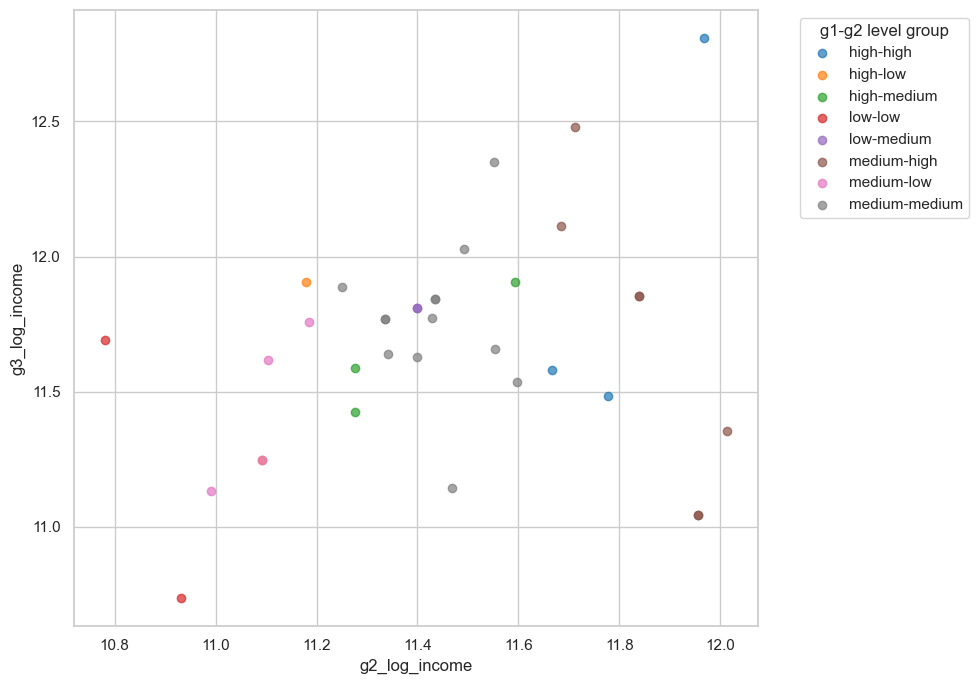

In [158]:
#draw the scatter plot by g1-g2 group,observe the degree of dispersion of y in the same group
class_most['group'] = class_most['g1_log_income_level'].astype(str) + '-' + class_most['g2_log_income_level'].astype(str)

plt.figure(figsize=(10, 7))
groups = class_most.groupby('group')
colors = plt.cm.tab10.colors  
for i, (name, group) in enumerate(groups):
    plt.scatter(group['g2_log_income'], group['g3_log_income'], 
                label=name, color=colors[i % 10], alpha=0.7)

plt.xlabel('g2_log_income')
plt.ylabel('g3_log_income')
plt.legend(title='g1-g2 level group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

As shown in the figure above, even after controlling for as many features as possible, the target variable still exhibits substantial within-group variance (impurity).

In [174]:
# Step 1: Group by the 'group' column and calculate variance and count of g3_log_income for each subgroup
group_stats = class_most.groupby('group')['g3_log_income'].agg(var='var', count='count')

# Step 2: Compute the weighted average of within-group variances
# Each group's variance is weighted by its sample size
weighted_within_var = (group_stats['var'] * group_stats['count']).sum() / group_stats['count'].sum()
print("Weighted within-group variance:", weighted_within_var)

# Step 3: Calculate the overall variance of g3_log_income (without any grouping)
overall_var = class_most['g3_log_income'].var()
print("Overall variance:", overall_var)

# Step 4: Compare the two and compute the ratio
# This tells us how much of the total variance is explained by between-group variation
explained_ratio = 1 - (weighted_within_var / overall_var)
print("Explained variance ratio (1 - residual impurity):", explained_ratio)

Weighted within-group variance: 0.18368335571471953
Overall variance: 0.16884390974641217
Explained variance ratio (1 - residual impurity): -0.08788854741989116


The variance decomposition results reveal a somewhat counterintuitive outcome. The **weighted within-group variance** is slightly **greater than the overall variance** (0.184 vs. 0.169), resulting in a **negative explained variance ratio** of approximately **−0.088**.

This suggests that, even after grouping by observed features, the **residual variation within subgroups exceeds the total population variance**. While this may seem paradoxical at first glance, it reflects two possible issues:

1. **Small or imbalanced group sizes**, where some subgroups may contain too few observations, causing unstable or inflated variance estimates.
2. **Group boundaries may not align with true variation structure**, meaning the grouping variables fail to segment the data in a meaningful way with respect to income.

In either case, this result reinforces the notion that the **current set of features has limited explanatory power**: not only is the between-group variance negligible, but the act of grouping may even introduce additional noise due to heterogeneity within groups.


## <a id='toc1_6_'></a>[References](#toc0_)

[1] 马丁. 中国的代际收入流动: 文献综述[J]. 世界经济探索, 2024, 13(3): 275-281. DOI: 10.12677/wer.2024.133030.

[2] Mayer S E, Lopoo L M. Has the intergenerational transmission of economic status changed? [R]. Chicago: Joint Center for Poverty Research, 2001. (JCPR Working Paper No. 227).

[3] SOLON G. Intergenerational income mobility in the United States [J]. The American Economic Review, 1992, 82(3): 393-408.
